In [1]:
# importing packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# importing the dataset
cfe_df = pd.read_csv('car_fuel_efficiency.csv')
cfe_df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [3]:
# looking at the car fuel efficiency dataframe
display(cfe_df.info())
display(cfe_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


None

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
count,9704.000000,9222.000000,8996.000000,9704.000000,8774.000000,9704.000000,9704,9704,9704,9202.000000,9704.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,2,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Europe,Gasoline,All-wheel drive,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,3254,4898,4876,NaN,NaN
mean,199.708368,3.962481,149.657292,3001.280993,15.021928,2011.484027,NaN,NaN,NaN,-0.006412,14.985243
std,49.455319,1.999323,29.879555,497.894860,2.510339,6.659808,NaN,NaN,NaN,1.048162,2.556468
min,10.000000,0.000000,37.000000,952.681761,6.000000,2000.000000,NaN,NaN,NaN,-4.000000,6.200971
25%,170.000000,3.000000,130.000000,2666.248985,13.300000,2006.000000,NaN,NaN,NaN,-1.000000,13.267459
50%,200.000000,4.000000,149.000000,2993.226296,15.000000,2012.000000,NaN,NaN,NaN,0.000000,15.006037
75%,230.000000,5.000000,170.000000,3334.957039,16.700000,2017.000000,NaN,NaN,NaN,1.000000,16.707965


In [4]:
# count of missing values
cfe_df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

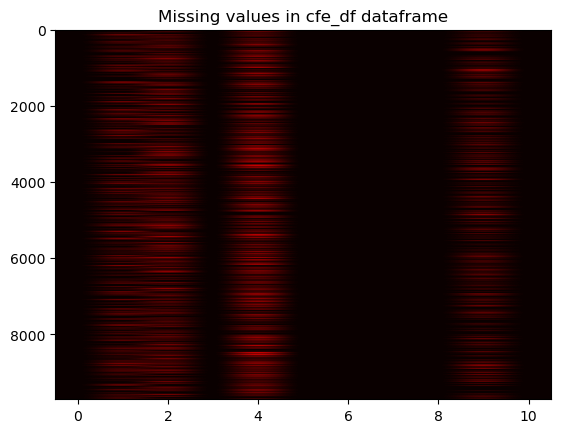

In [5]:
# visualizing the missing values
plt.imshow(cfe_df.isnull(), cmap='hot', aspect='auto')
plt.title('Missing values in cfe_df dataframe')
plt.show()

Only numerical features contain missing values

In [6]:
# filling missing values with zeros
cfe_df_filled = cfe_df.fillna(0)
cfe_df_filled.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [7]:
# separating categorical and numerical features
# categorical features
cat_features  = list(cfe_df.select_dtypes(include=['object', 'category']).columns)
print(cat_features)

# numerical features
num_features = list(cfe_df.select_dtypes(include=np.number).columns)
num_features.remove('fuel_efficiency_mpg') # can remove the target var for future analysis (it is non-null)
print(num_features)

['origin', 'fuel_type', 'drivetrain']
['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight', 'acceleration', 'model_year', 'num_doors']


In [8]:
# value counts of each categorical features
for feature in cat_features:
    print(cfe_df_filled[feature].value_counts())
    print()

Europe    3254
Asia      3247
USA       3203
Name: origin, dtype: int64

Gasoline    4898
Diesel      4806
Name: fuel_type, dtype: int64

All-wheel drive      4876
Front-wheel drive    4828
Name: drivetrain, dtype: int64



In [9]:
# creating split of train, validation, test 60%, 20%, 20% data
from sklearn.model_selection import train_test_split

full_train_df, test_df = train_test_split(cfe_df_filled, test_size=0.2, random_state=1)

train_df, val_df = train_test_split(full_train_df, test_size=0.25, random_state=1)

# cross checking the splits
print(len(train_df), len(val_df), len(test_df))
print(round(len(train_df)/len(cfe_df_filled), 2), round(len(val_df)/len(cfe_df_filled), 2), round(len(test_df)/len(cfe_df_filled), 2))

5822 1941 1941
0.6 0.2 0.2


In [10]:
# resetting indices of the newly split dfs
full_train_df = full_train_df.reset_index(drop=True)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [11]:
# target variables
y_full_train = full_train_df['fuel_efficiency_mpg'].values
y_train = train_df['fuel_efficiency_mpg'].values
y_val = val_df['fuel_efficiency_mpg'].values
y_test = test_df['fuel_efficiency_mpg'].values

In [12]:
# removing  target vars from feature set
del full_train_df['fuel_efficiency_mpg']
del train_df['fuel_efficiency_mpg']
del val_df['fuel_efficiency_mpg']
del test_df['fuel_efficiency_mpg']

In [13]:
# importing dict vectorizer
from sklearn.feature_extraction import DictVectorizer

In [14]:
# fn to vectorize dataframes
def vectorize_dfs(train_or_full_df, val_or_test_df):
    
    # initialize dict vectorizer
    dictionary_vectorizer = DictVectorizer(sparse=False)
    
    # create x train or full train after vectorizing features respectively
    X_train_or_full = dictionary_vectorizer.fit_transform(train_or_full_df[cat_features + num_features].to_dict(orient='records'))
    
    # transform the val or test set features respectively
    X_val_or_test = dictionary_vectorizer.transform(val_or_test_df[cat_features + num_features].to_dict(orient='records'))
    
    # extract the featuere names
    feature_names = dictionary_vectorizer.get_feature_names_out()
    
    print('vectorizing successful!')

    return X_train_or_full, X_val_or_test, feature_names

In [15]:
# vectorizing features of train and validation 
X_train, X_val, feature_names_train = vectorize_dfs(train_df, val_df)

# vectorizing features of full train and test 
X_full_train, X_test, feature_names_full_train = vectorize_dfs(full_train_df, test_df)

vectorizing successful!
vectorizing successful!


# QUESTION 1 - One level deep Decision Tree Regressor 

In [16]:
# importing Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_text

In [17]:
# QUESTION 1:

# instantiate the decision tree regressor
dtr_model_q1 = DecisionTreeRegressor(max_depth=1)

# fitting the data
dtr_model_q1.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


[Text(0.5, 0.75, 'vehicle_weight <= 3022.107\nsquared_error = 6.398\nsamples = 5822\nvalue = 14.994'),
 Text(0.25, 0.25, 'squared_error = 2.575\nsamples = 3034\nvalue = 16.882'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'squared_error = 2.453\nsamples = 2788\nvalue = 12.938'),
 Text(0.625, 0.5, '  False')]

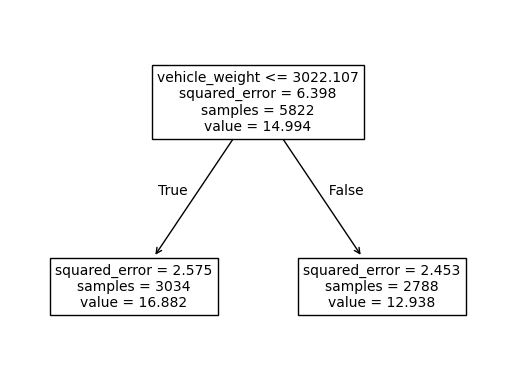

In [18]:
# visualize the decision tree
plot_tree(dtr_model_q1, feature_names=feature_names_train, fontsize=10)

In [19]:
# visualizing in another way
print(export_text(dtr_model_q1, feature_names=feature_names_train))

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



**'vehicle_weight'** is used to split the data in the given decision tree

# QUESTION 2 - Random Forest Regressor with 10 estimators

In [20]:
# importing random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

In [21]:
# QUESTION 2:

# instantiate the Random Forest regressor
rfr_model_q2 = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

# fit the data
rfr_model_q2.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
# predict the validation feature set
y_pred_q2 = rfr_model_q2.predict(X_val)

# rmse of model on validation data
rmse_q2 = root_mean_squared_error(y_val, y_pred_q2)

print('RMSE of Random Forest Regressor with 10 estimators:', rmse_q2)

RMSE of Random Forest Regressor with 10 estimators: 0.4599777557336148


The RMSE of Random Forest Regressor with 10 estimators is 0.46 (approx)

# QUESTION 3 - Experiment random forest regressor using different n_estimators

In [23]:
from IPython.display import clear_output

In [24]:
# QUESTION 3:

# custom fn to train and predict using n_estimators
def rfr_fit_predict_q3(X_train, y_train, n_estimators, X_val):
    
    # instantiate the Random Forest regressor
    rfr_model_q3 = RandomForestRegressor(n_estimators=n_estimators, random_state=1)

    # fitting the data
    rfr_model_q3.fit(X_train, y_train)

    # predict the validation feature set
    y_pred_q3 = rfr_model_q3.predict(X_val)

    return y_pred_q3

In [25]:
# loop through each n_estimators

# storing rmses in a dict
rmse_dict_q3 = {}

for n_est in list(range(10, 201, 10)):
    
    # clearing the previously built regressor for further iterations
    rfr_model_q3 = None

    y_pred_q3 = rfr_fit_predict_q3(X_train, y_train, n_est, X_val)

    # rmse of model on validation data
    rmse_dict_q3[n_est] = round(root_mean_squared_error(y_val, y_pred_q3), 3)
    
    clear_output(wait=True)
    print(f'successfully calculated the rmse of Random forest regressor for n_estimator={n_est}')

successfully calculated the rmse of Random forest regressor for n_estimator=200


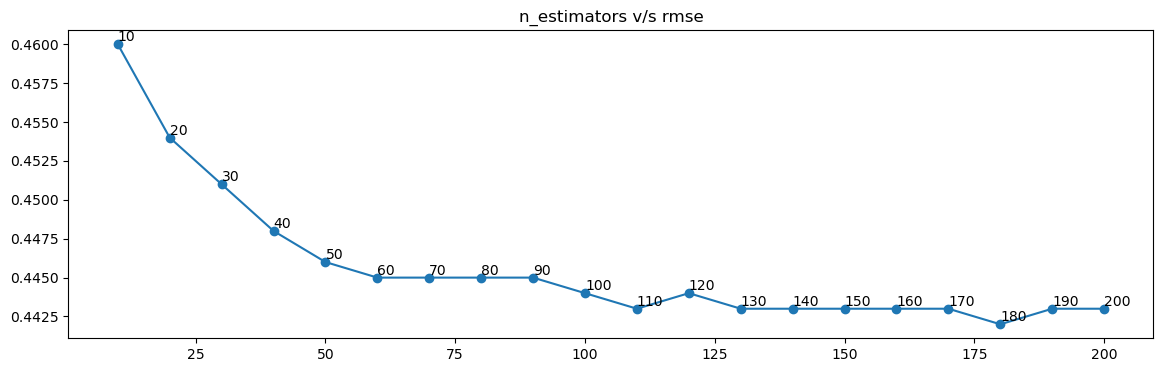

In [26]:
# plotting rmses across different n_estimators
plt.figure(figsize=(14,4))
plt.plot(rmse_dict_q3.keys(), rmse_dict_q3.values(), marker='o')
for n_est, rmse in rmse_dict_q3.items():
    plt.text(n_est, rmse, str(n_est), ha='left', va='bottom')
plt.title('n_estimators v/s rmse')
plt.show()

The rmse values starts to saturate **around 60-80 n_estimators**

# QUESTION 4 - Random forest regressor using various n_estimators & max_depth

In [27]:
# QUESTION 4:

# custom fn to train and predict using n_estimators and max_depth
def rfr_fit_predict_q4(X_train, y_train, n_estimators, max_depth, X_val):
    
    # instantiate the Random Forest regressor
    rfr_model_q4 = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=1)

    # fitting the data
    rfr_model_q4.fit(X_train, y_train)

    # predict the validation feature set
    y_pred_q4 = rfr_model_q4.predict(X_val)

    return y_pred_q4

In [28]:
# loop through each n_estimators

# storing rmses in a dict
mean_rmse_dict_q4 = {}

for max_dep in [10, 15, 20, 25]:
    
    # list of rmse values calculated for different esimators
    rmse_list_q4 = []
    
    for n_est in list(range(10, 201, 10)):
        
        # clearing the previously built random forest regressor model for further iterations
        rfr_model_q4 = None

        y_pred_q4 = rfr_fit_predict_q4(X_train, y_train, n_est, max_dep, X_val)

        # rmse of model on validation data
        rmse_list_q4.append(root_mean_squared_error(y_val, y_pred_q4))
        
        clear_output(wait=True)
        print(f'successfully calculated the rmse of Random forest regressor for max_depth={max_dep}, n_estimator={n_est}')
        
    # MEAN RMSE CALCULATION
    mean_rmse_dict_q4[max_dep] = np.mean(rmse_list_q4)
        

successfully calculated the rmse of Random forest regressor for max_depth=25, n_estimator=200


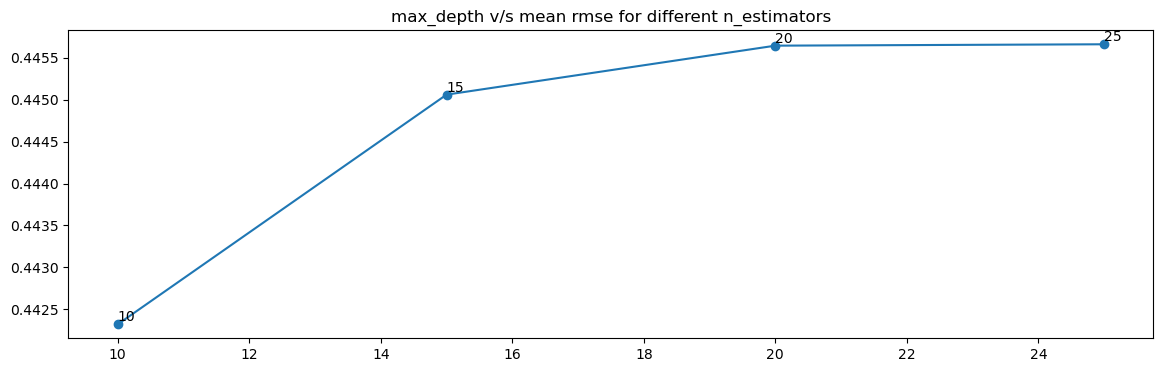

In [29]:
# plotting rmses across different n_estimators
plt.figure(figsize=(14,4))
plt.plot(mean_rmse_dict_q4.keys(), mean_rmse_dict_q4.values(), marker='o')
for max_dep, mean_rmse in mean_rmse_dict_q4.items():
    plt.text(max_dep, mean_rmse, str(max_dep), ha='left', va='bottom')
plt.title('max_depth v/s mean rmse for different n_estimators')
plt.show()

In [30]:
# dictionary of max_depths as keys and mean rmse as values 
print({max_dep: round(mean_rmse, 3) for max_dep, mean_rmse  in sorted(mean_rmse_dict_q4.items(), key=lambda item: item[1])})

{10: 0.442, 15: 0.445, 20: 0.446, 25: 0.446}


The model with best mean rmse value was found when training with a **max_depth of 10** 

# QUESTION 5 - feature importances of a random forest regression with 10 estimators and a max depth of 20

In [31]:
# QUESTION 5:

# instantiate the Random Forest regressor for 10 estimators and tree depth of 20
rfr_model_q5 = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)

# fitting the data 
rfr_model_q5.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
# find out the feature importances 
feature_importances = rfr_model_q5.feature_importances_

# create a dataframe using feature and importances and sorth it by the most important feature
feature_importance_df = pd.DataFrame({'Feature': feature_names_full_train, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

display(feature_importance_df)

,Feature,Importance
13,vehicle_weight,0.959162
6,horsepower,0.016040
0,acceleration,0.011471
3,engine_displacement,0.003269
7,model_year,0.003182
8,num_cylinders,0.002359
9,num_doors,0.001591
12,origin=USA,0.000555
11,origin=Europe,0.000520
10,origin=Asia,0.000476


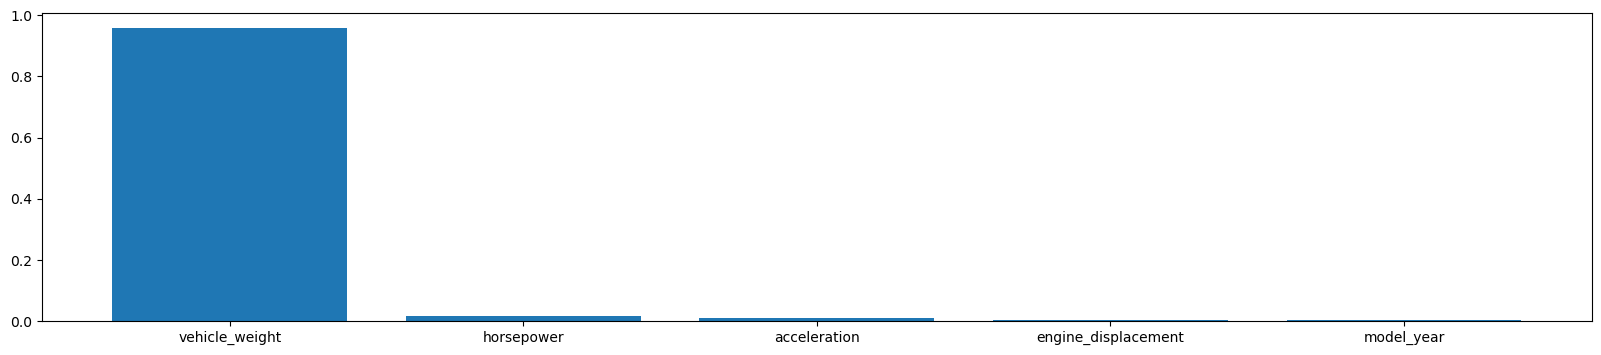

In [33]:
# plotting top 5 feature importances
plt.figure(figsize=(20, 4))
plt.bar(feature_importance_df['Feature'][:5],feature_importance_df['Importance'][:5])
plt.show()

**'vehicle_weight'** is the most important feature 

# QUESTION 6 - xGBoost for different eta values

In [34]:
# QUESTION 6:

# installing xgboost
# !pip install xgboost

In [35]:
# importing xgb
import xgboost as xgb

In [36]:
# creating the dmatrices for training and validation sets

dtrain_q6 = xgb.DMatrix(data=X_train, label=y_train)

dval_q6 = xgb.DMatrix(data=X_val, label=y_val)

evals_q6 = [ (dtrain_q6, 'train'), (dval_q6, 'eval')]

In [37]:
# creating a dictionary of the xgb params
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

In [38]:
# training the xgboost model using eta 0.3
xgb_high_eta_q6 = xgb.train(params=xgb_params, dtrain=dtrain_q6, num_boost_round=100, evals=evals_q6)

# training another model using eta 0.1
xgb_params['eta'] = 0.1

xgb_low_eta_q6 = xgb.train(params=xgb_params, dtrain=dtrain_q6, num_boost_round=100, evals=evals_q6)

[0]	train-rmse:1.81393	eval-rmse:1.85444
[1]	train-rmse:1.31919	eval-rmse:1.35353
[2]	train-rmse:0.98120	eval-rmse:1.01316
[3]	train-rmse:0.75443	eval-rmse:0.78667
[4]	train-rmse:0.60680	eval-rmse:0.64318
[5]	train-rmse:0.51381	eval-rmse:0.55664
[6]	train-rmse:0.45470	eval-rmse:0.50321
[7]	train-rmse:0.41881	eval-rmse:0.47254
[8]	train-rmse:0.39534	eval-rmse:0.45509
[9]	train-rmse:0.38038	eval-rmse:0.44564
[10]	train-rmse:0.37115	eval-rmse:0.43896
[11]	train-rmse:0.36361	eval-rmse:0.43594
[12]	train-rmse:0.35850	eval-rmse:0.43558
[13]	train-rmse:0.35365	eval-rmse:0.43394
[14]	train-rmse:0.35025	eval-rmse:0.43349
[15]	train-rmse:0.34666	eval-rmse:0.43362
[16]	train-rmse:0.34459	eval-rmse:0.43378
[17]	train-rmse:0.34128	eval-rmse:0.43405
[18]	train-rmse:0.33822	eval-rmse:0.43391
[19]	train-rmse:0.33709	eval-rmse:0.43374
[20]	train-rmse:0.33553	eval-rmse:0.43376
[21]	train-rmse:0.33243	eval-rmse:0.43453
[22]	train-rmse:0.33031	eval-rmse:0.43510
[23]	train-rmse:0.32815	eval-rmse:0.43601
[2

In [39]:
# making prediction on validation set for model with eta 0.3
y_pred_high_eta_q6 = xgb_high_eta_q6.predict(dval_q6)

# calculating rmse
rmse_high_eta_q6 = root_mean_squared_error(y_val, y_pred_high_eta_q6)
print(f'RMSE with eta=0.3: {rmse_high_eta_q6:.4f}')

RMSE with eta=0.3: 0.4502


In [40]:
# making prediction on validation set for model with eta 0.1
y_pred_low_eta_q6 = xgb_low_eta_q6.predict(dval_q6)

# calculating rmse
rmse_low_eta_q6 = root_mean_squared_error(y_val, y_pred_low_eta_q6)
print(f'RMSE with eta=0.1: {rmse_low_eta_q6:.4f}')

RMSE with eta=0.1: 0.4262


**The xGBoost model with eta 0.1 performed better with RMSE 0.4262** than the model with eta 0.3 (which had rmse of 0.4502) 